Desarrollado en https://colab.research.google.com/drive/1McsINX2Rq2Cp8bjQChV-x9iacWYCUB1b?usp=sharing

# Pregunta 1
Desarrollar un algoritmo que, dado un arreglo de valores de sensores y un valor objetivo, cuente el número de pares de sensores cuyos valores suman exactamente el valor objetivo utilizando la técnica de divide y vencerás.

Se requiere:
- Desarrollar el algoritmo en lenguaje Python (.py o .ipynb).   
-	Resolver el ejercicio utilizando la técnica divide y vencerás.
-	(2 ptos.) Hallar el número de pares que cumplen la condición dada.
-	(1 ptos.) Mostrar los elementos (pares) cumplen la condición dada.


EJEMPLO: \
Entrada de Datos (input) \
Valores de Sensores: [1, 5, 7, -1, 6, 3, 4, 2] \
Valor objetivo: 6

Salida de Datos (output) \
El número de pares que suman 6 es: 3 \
Los pares de sensores son: {(1,5), (7,-1), (4,2)}



In [13]:
def count_pairs_with_sum(sensor_values, target_sum):
    # Función principal que utiliza la técnica de divide y vencerás
    def divide_and_conquer(arr, start, end, target):
        # Caso base: si hay menos de dos elementos, no puede haber pares
        if end - start <= 1:
            return 0, []

        # Dividir el arreglo en dos mitades
        mid = (start + end) // 2

        # Resolver recursivamente en las dos mitades
        left_count, left_pairs = divide_and_conquer(arr, start, mid, target)
        right_count, right_pairs = divide_and_conquer(arr, mid, end, target)

        # Contar los pares que suman el valor objetivo y están distribuidos entre las dos mitades
        cross_count, cross_pairs = count_cross_pairs(arr, start, mid, end, target)

        # Combinar los resultados de las dos mitades y los pares cruzados
        total_count = left_count + right_count + cross_count
        total_pairs = left_pairs + right_pairs + cross_pairs

        return total_count, total_pairs

    # Función auxiliar para contar los pares que suman el valor objetivo y están distribuidos entre las dos mitades
    def count_cross_pairs(arr, start, mid, end, target):
        count = 0
        pairs = set()  # Using a set to avoid duplicates

        # Crear diccionarios para almacenar la frecuencia de los valores en cada mitad
        left_dict = {}
        right_dict = {}

        # Llenar el diccionario de la mitad izquierda
        for i in range(start, mid):
            if arr[i] not in left_dict:
                left_dict[arr[i]] = 0
            left_dict[arr[i]] += 1

        # Llenar el diccionario de la mitad derecha
        for j in range(mid, end):
            if arr[j] not in right_dict:
                right_dict[arr[j]] = 0
            right_dict[arr[j]] += 1

        # Contar los pares cruzados que suman el valor objetivo
        for key in left_dict:
            complement = target - key
            if complement in right_dict:
                # El número de pares es el producto de las frecuencias de key y complement
                count += left_dict[key] * right_dict[complement]
                pairs.add((key, complement))

        return count, list(pairs)  # Convert set to list for returning

    # Llamada inicial a la función divide_and_conquer
    count, pairs = divide_and_conquer(sensor_values, 0, len(sensor_values), target_sum)
    return count, pairs

# Ejemplo de uso
sensor_values = [1, 5, 7, -1, 6, 3, 4, 2]
target_sum = 6

# Ejecutar la función
count, pairs = count_pairs_with_sum(sensor_values, target_sum)

# Mostrar los resultados
print(f"El número de pares que suman {target_sum} es: {count}")
print(f"Los pares de sensores son: {pairs}")


El número de pares que suman 6 es: 3
Los pares de sensores son: [(1, 5), (7, -1), (4, 2)]


In [24]:
import random

def generate_unique_numbers():
  numbers = set()
  elem_size = random.randint(8, 10)
  while len(numbers) < elem_size:
    numbers.add(random.randint(-10, 10))
  return list(numbers)


for i in range(5):
  sample = generate_unique_numbers()
  objective_number = random.randint(0,6)
  print(f"{i+1}: {sample}; objective number = {objective_number}")
  print(count_pairs_with_sum(sample, objective_number))
  print()

1: [0, 2, 9, -10, -8, -7, -4, -1]; objective number = 1
(2, [(2, -1), (9, -8)])

2: [4, 5, 9, 10, -2, -9, -6, -5, -1]; objective number = 6
(0, [])

3: [3, 4, -10, -8, -7, -4, -3, -1]; objective number = 2
(1, [(3, -1)])

4: [1, 4, 5, 6, 7, 8, -9, -8, -3]; objective number = 3
(1, [(6, -3)])

5: [1, 2, 3, 9, -10, -9, -8, -5, -4, -1]; objective number = 5
(2, [(2, 3), (9, -4)])



Ejemplo de cómo es que se divide la lista y resumen de cómo se combina: https://replit.com/@u202312230/basic-python#draws/reto%203.draw

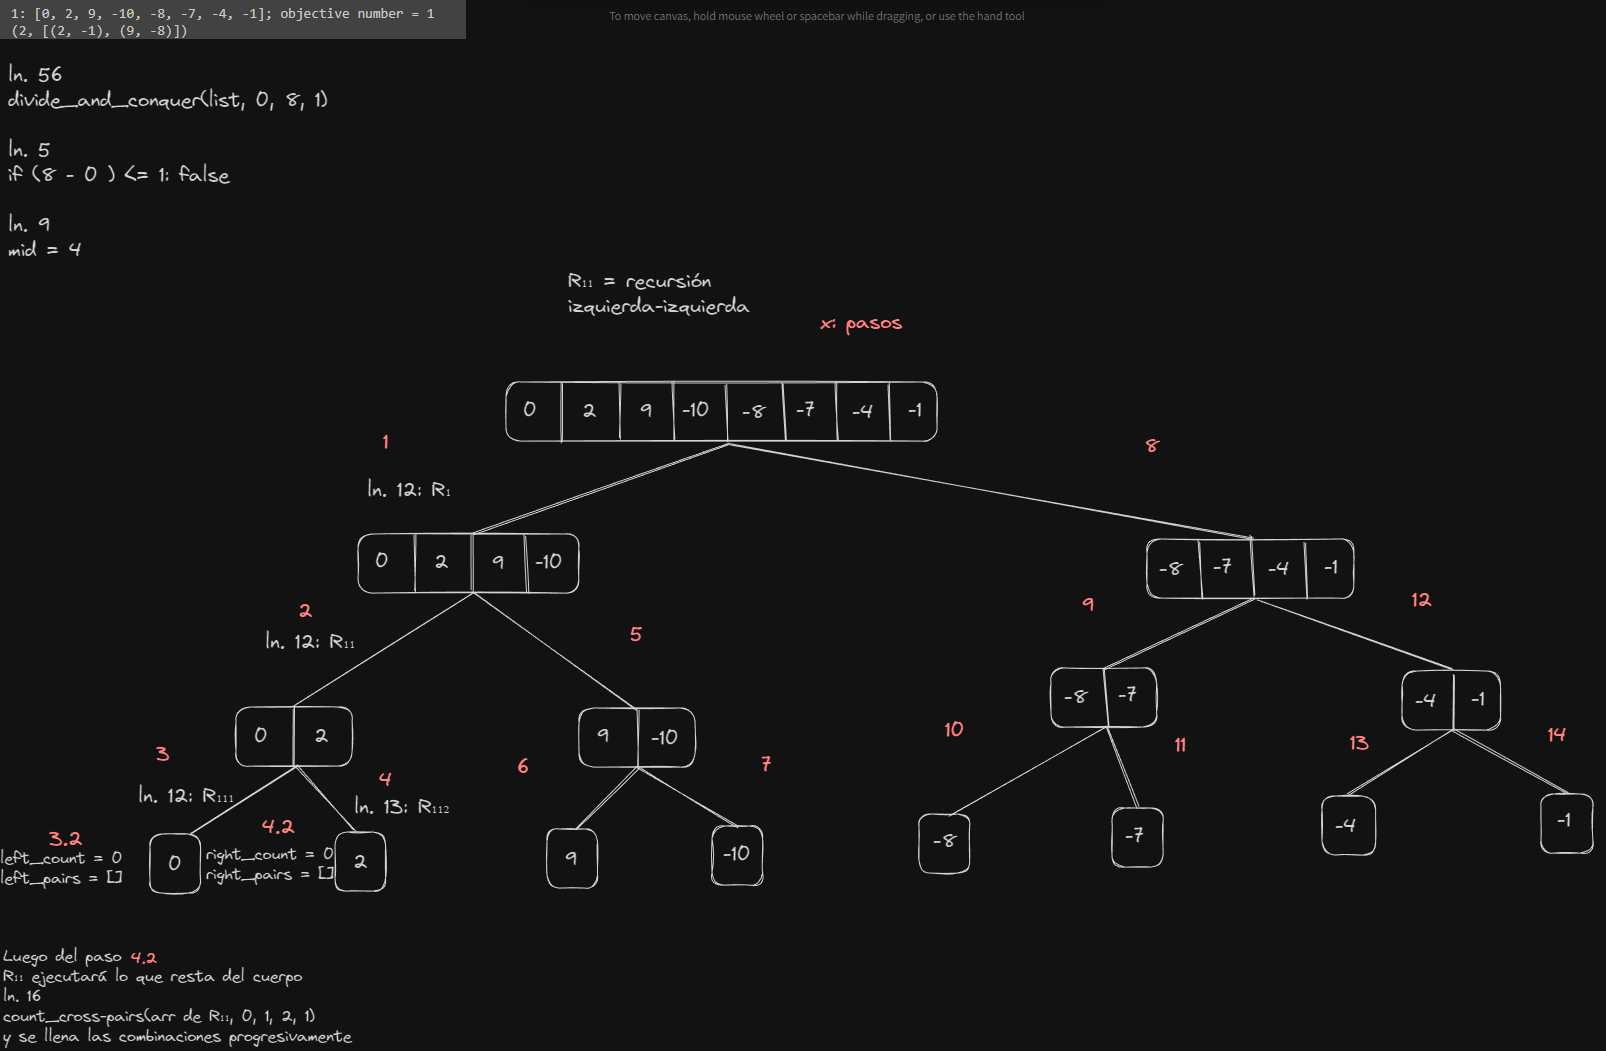

# Pregunta 2

-	 (1 punto) ¿Qué pasaría si intentamos aplicar búsqueda binaria con DV en un vector no ordenado?

La búsqueda binaria se basa en el concepto en el que el **vector está ordenado**. Al tratar de manipular su implementación para convertirla en un algoritmo de DV, no estamos modificando esa definición, es decir, que no hay garantía que el elemento que retorne sea el correcto.

-	(1 punto) Hallar la complejidad big O en $T(n) = 2T(n/7) + n^3$

1) Identificamos variables \
$
a = 2 \\
b = 7 \\
f(n) = n^3 \\
log_b(a) = log_7(2) \approx 0.36
$ \
\
2) Comparamos \
$
\lim_{n \to \infty} \frac{f(n)}{n^{log_b(a)}} =  \lim_{n \to \infty} \frac{n^3}{n^{log_7(2)}} = {\infty} \\
$ \
$\therefore f(n)$ crece más rápido que $n^{log_b(a)} $
\
\
3) Caso 3 del teorema maestro: \
$
\exists \epsilon >0: f(n) = \Omega (n^{log_7(2) + \epsilon}) \\
\therefore T(n) = \Theta(f(n)) = \Theta(n^3) = O(n^3)
$